In [68]:
#audio_file = "selec_enreg_2018/2018-04-28 11.01.40 - Sc011 (m).wav"
audio_file = "sons types/Trains de Kaks et Mews avec HF.wav"

#Kaks BF.wav
#Train de Kaks et Mew BF.wav
#Trains de Kaks et Mews avec HF.wav
#Mew avec HF.wav
#"sons types/Trains de Kaks et Mews avec HF.wav"


import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import wiener, spectrogram, find_peaks
import soundfile as sf

490962


Text(0.5, 0, 'Temps (s)')

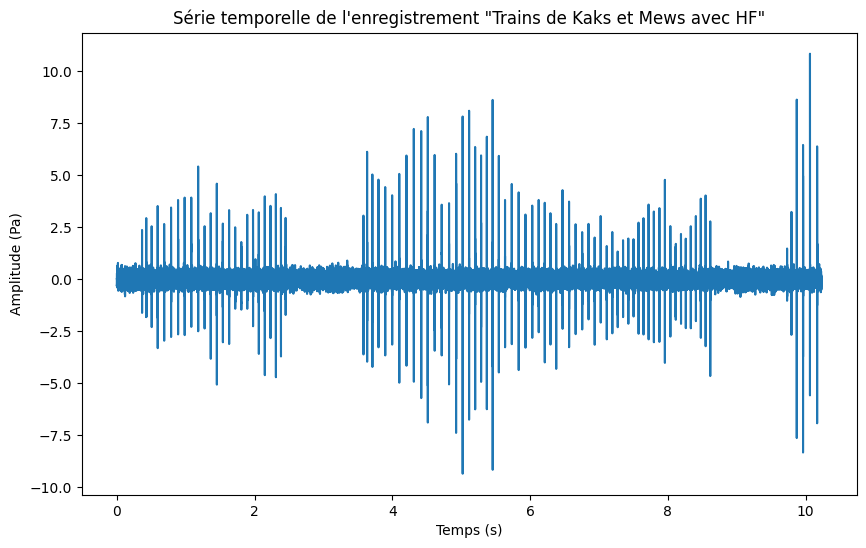

In [69]:
signal, sr = librosa.load(audio_file,sr=None)
if len(signal) %2 ==1:
    signal = signal[:-1]
signal = signal - np.mean(signal)
cal = 10**(27/20)  # unit is equiv 27 dB re 1 Pa
signal = cal * signal
times = librosa.times_like(signal, sr=sr)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(signal))/sr,signal)
print(len(signal))
plt.title('Série temporelle de l\'enregistrement "Trains de Kaks et Mews avec HF"')
plt.ylabel('Amplitude (Pa)')
plt.xlabel('Temps (s)')

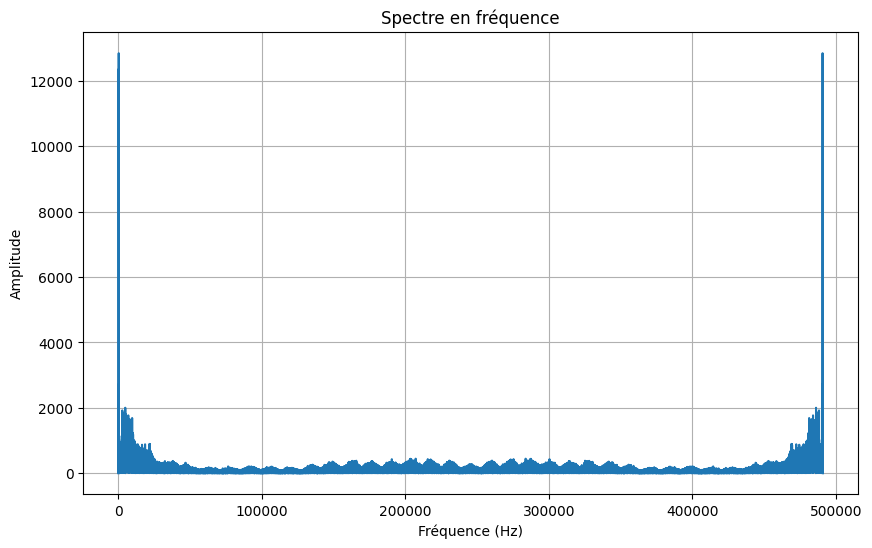

In [70]:
#on passe en FFT
fft_result = np.fft.fft(signal)
#fft_result = np.fft.fftshift(fft_result_)[len(fft_result_)//2+1:]
# Fréquences correspondantes
#freq = np.fft.fftfreq(len(signal))
#freq = freq_[:len(freq_)//2]


# Affichage du spectre de magnitude
plt.figure(figsize=(10, 6))
plt.plot(np.abs(fft_result))
plt.title('Spectre en fréquence')
plt.ylabel('Amplitude')
plt.xlabel('Fréquence (Hz)')
plt.grid()
plt.show()



#plt.plot(np.real(np.fft.ifft(fft_result)))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


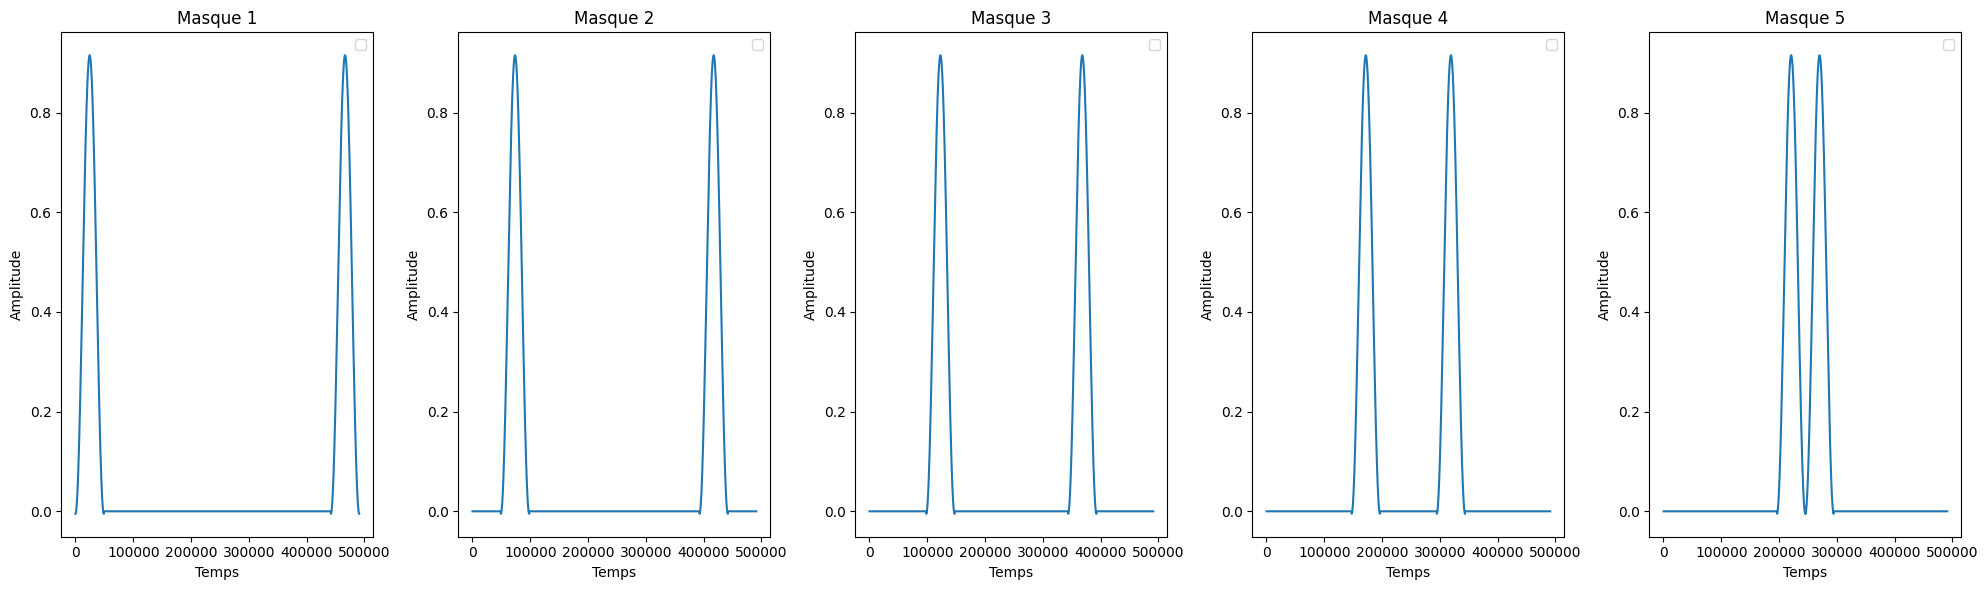

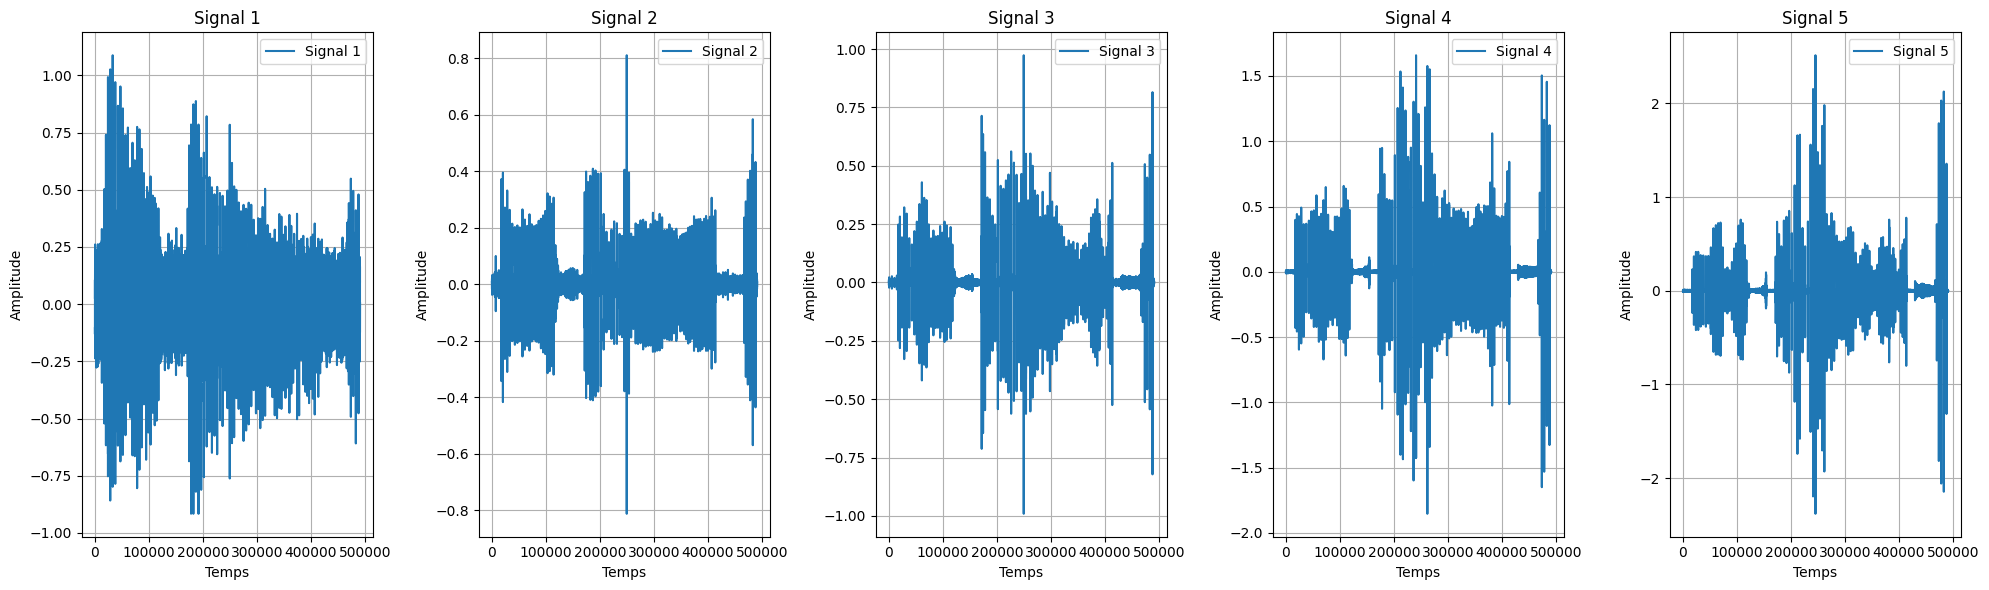

In [71]:
#masque pour diviser en 5 le spectre + apodisation

# Définition du masque apodisé
num_sections = 5
section_width = len(signal)//2 // num_sections
masks = []
for i in range(num_sections):
    mask = np.zeros(len(signal)//2)
    start_index = i * section_width
    end_index = min((i + 1) * section_width, len(signal)//2)
    mask[start_index:end_index] = np.hamming(end_index - start_index) - 0.085
    mask = np.concatenate((mask, mask[::-1]))
    masks.append(mask)

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

for i in range(5):
    axes[i].plot(masks[i])
    axes[i].set_title(f'Masque {i+1}')
    axes[i].set_xlabel('Temps')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend()
# Ajustement de l'espacement entre les graphiques
plt.tight_layout()
plt.show()


# Extraire les cinq signaux différents
extracted_signals = []
convolved_spectrums = []
for i, mask in enumerate(masks):
    convolved_spectrum = fft_result * mask
    #
    convolved_spectrums.append(convolved_spectrum)
    #
    inverse_fft = np.fft.ifft(convolved_spectrum).real
    extracted_signals.append(inverse_fft[100:-100])

#sig = convolved_spectrums[0]
'''for conv in convolved_spectrums[1:]:
    sig = sig + conv 
plt.plot(sig)'''

# Affichage des cinq signaux extraits

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

# Affichage des cinq graphiques
for i, signal_e in enumerate(extracted_signals):
    axes[i].plot(signal_e, label=f'Signal {i+1}')
    axes[i].set_title(f'Signal {i+1}')
    axes[i].set_xlabel('Temps')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend()
    axes[i].grid()

# Ajustement de l'espacement entre les graphiques
plt.tight_layout()
plt.show()




490772
12270
12270


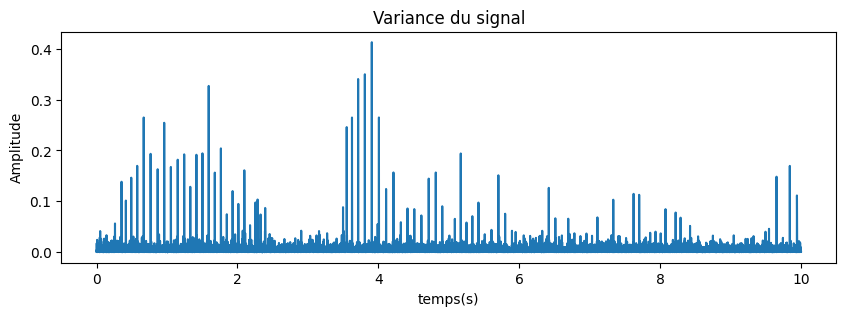

490772
12270
12270


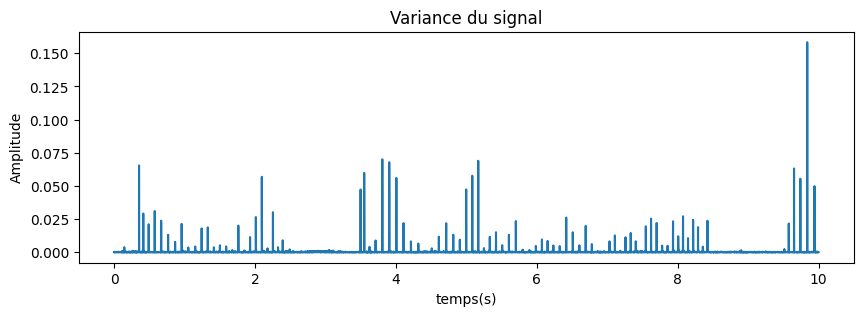

490772
12270
12270


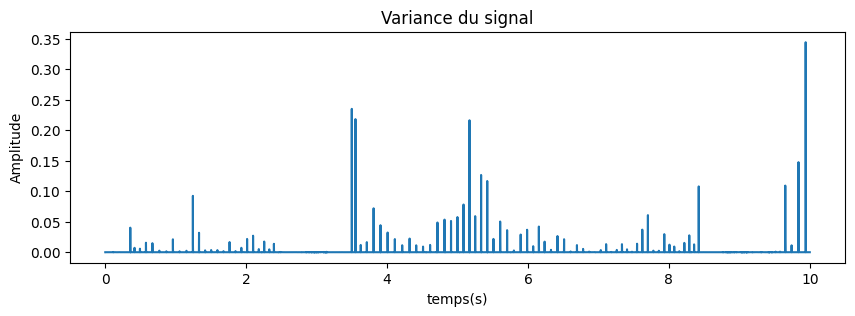

490772
12270
12270


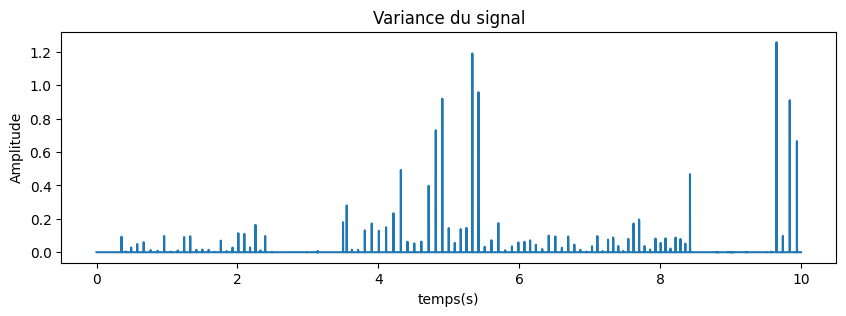

490772
12270
12270


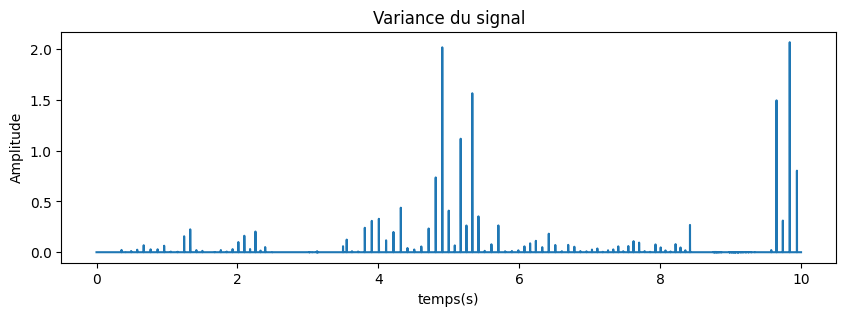

12270


In [72]:

M = np.ones(11)/11
Variance_cum = []
for i, signal_e in enumerate(extracted_signals):
    variance_cum = np.convolve(signal_e**2, M)
    print(len(variance_cum))
    resolution = 40
    variance_cum = variance_cum[::resolution]
    print(len(variance_cum))
    variance_cum = np.where(variance_cum < 1e-6, 0, variance_cum)
    print(len(variance_cum))
    Variance_cum.append(variance_cum)
    plt.figure(figsize=(10, 3))
    plt.plot(np.arange(len(variance_cum))/N*10, variance_cum)
    plt.title('Variance du signal')
    plt.xlabel('temps(s)')
    plt.ylabel('Amplitude')
    plt.show()

N = len(variance_cum//40)
print(N) 


12270
4066
12270
4033
12270
4020
12270
3999
12270
4091


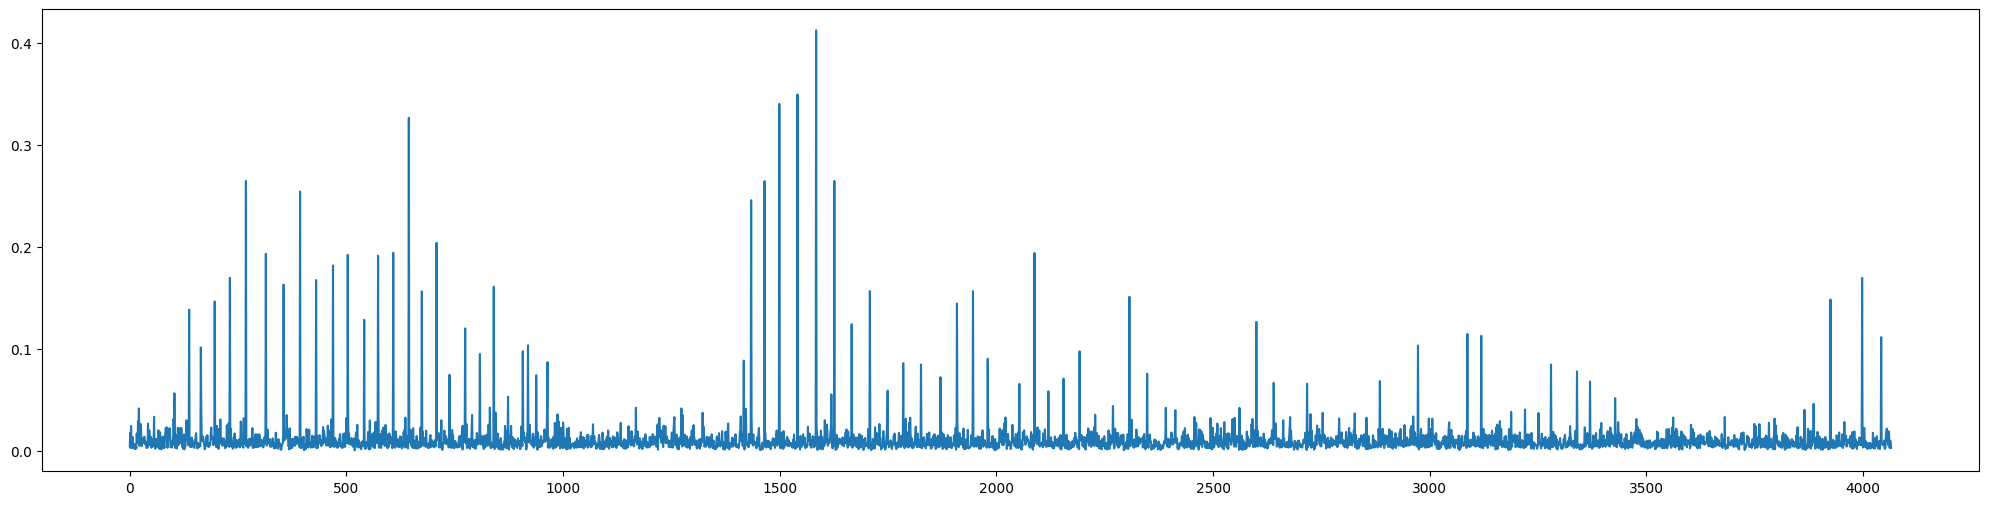

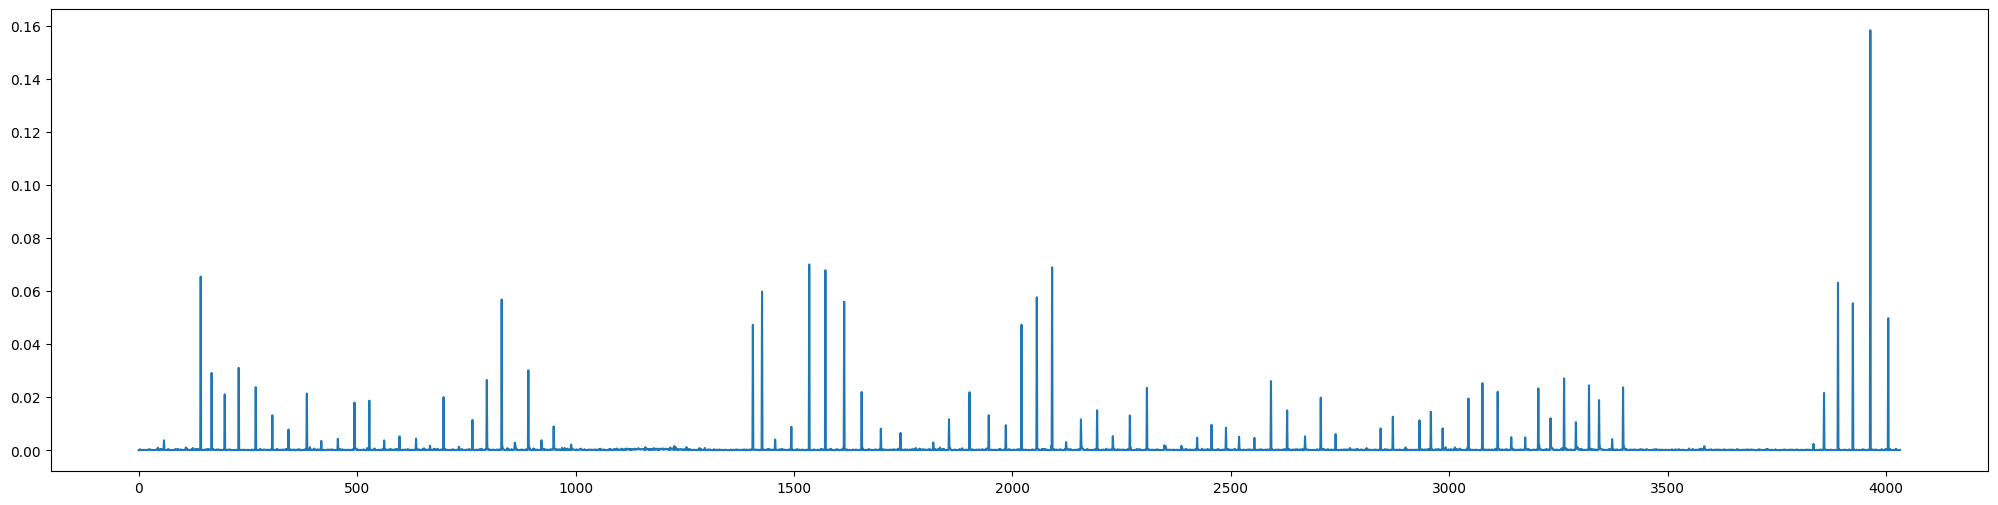

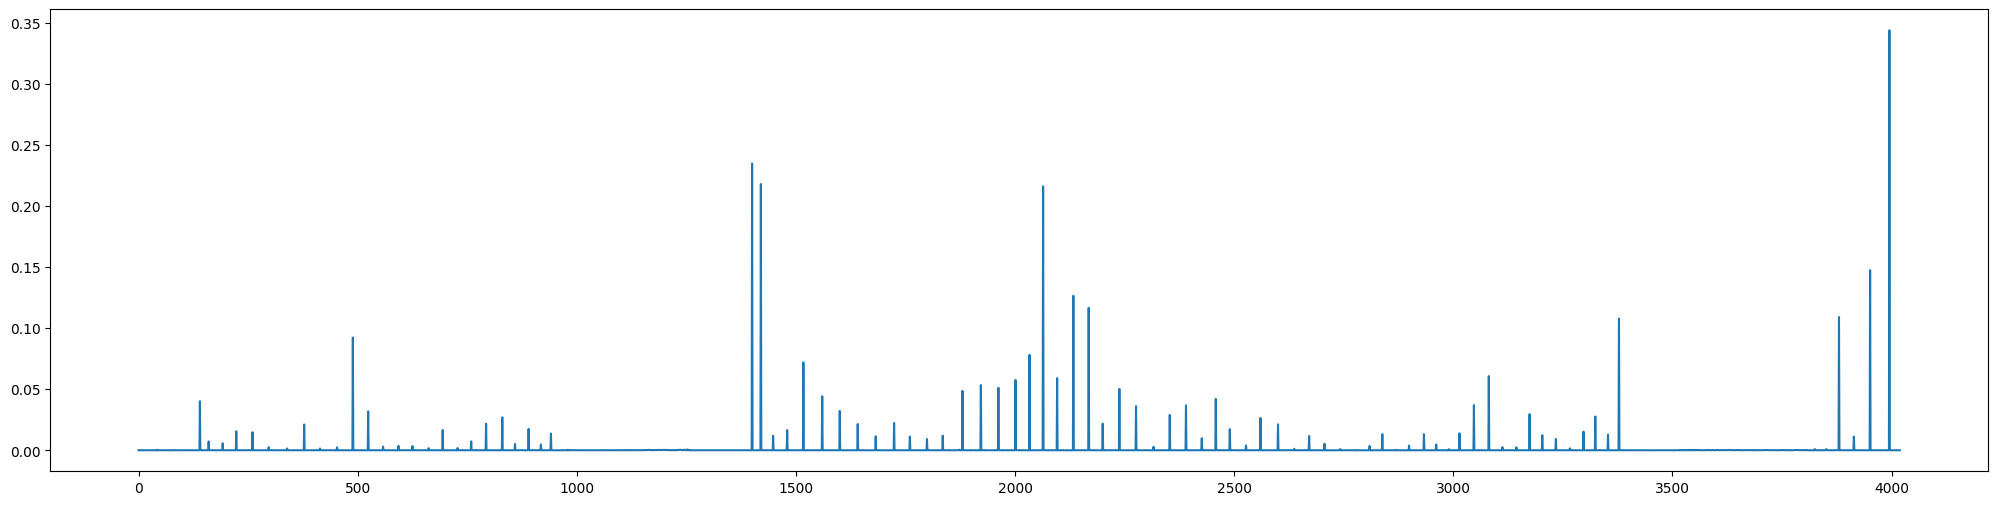

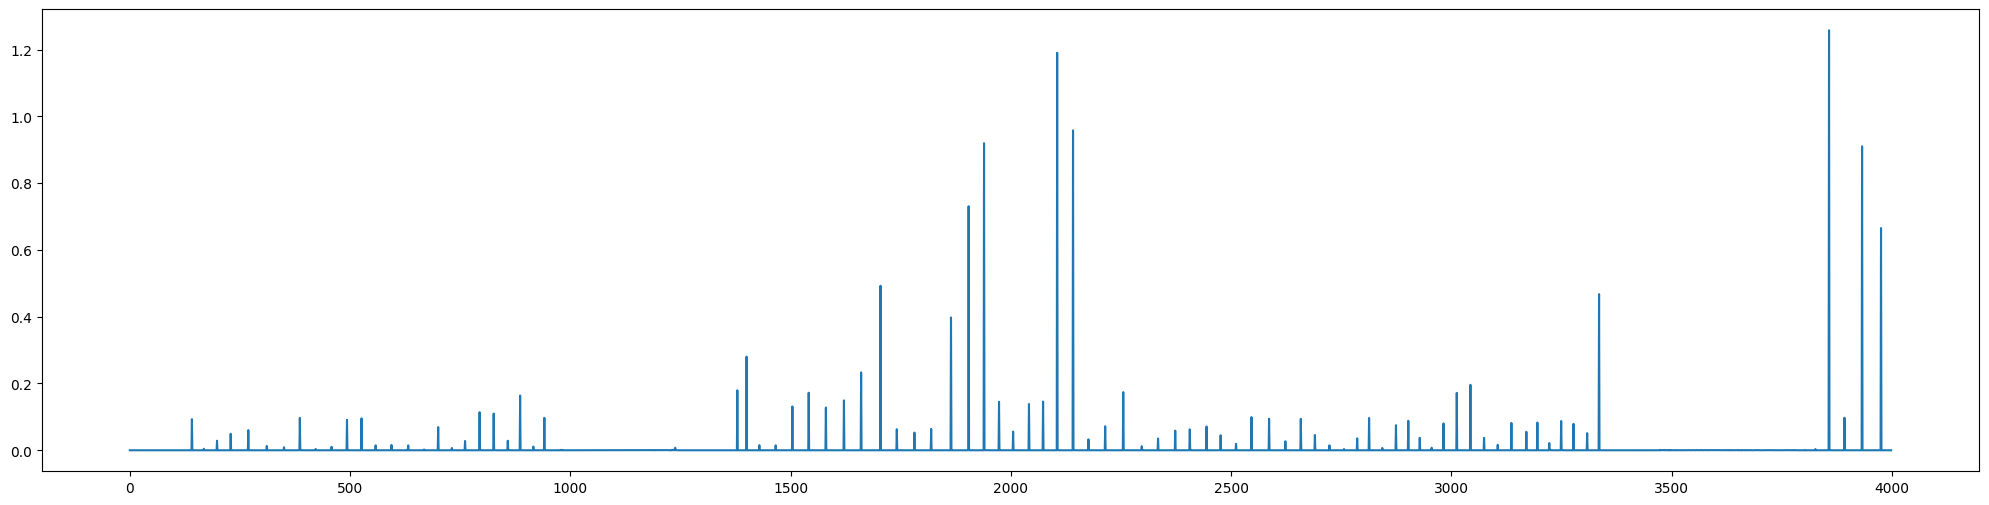

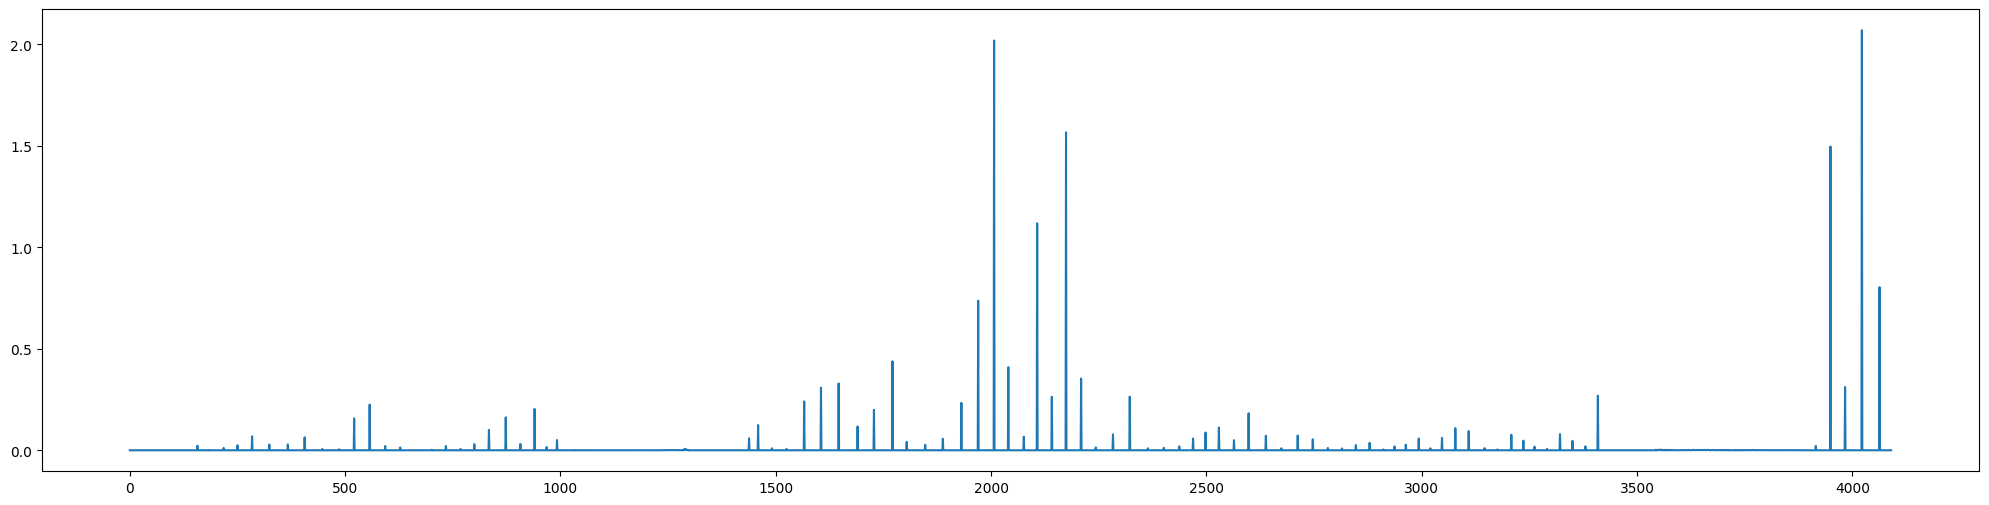

In [73]:
#recherche des maxima locaux :
results = []
for j in range(num_sections):
    shift_d = np.insert(Variance_cum[j][:-1],0,0)
    shift_g = np.insert(Variance_cum[j][1:],-1,0)
    result = [Variance_cum[j][i] > shift_d[i] and Variance_cum[j][i] > shift_g[i] for i in range(len(Variance_cum[j]))]
    results.append(result)
    print(len(result))
    print(sum(result))

    plt.figure(figsize=(25, 6))
    plt.plot(Variance_cum[j][results[j]])

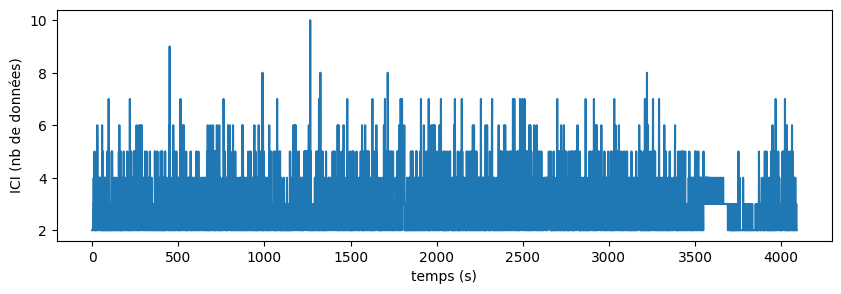

(array([1.634e+03, 1.393e+03, 6.620e+02, 2.860e+02, 0.000e+00, 7.800e+01,
        3.200e+01, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

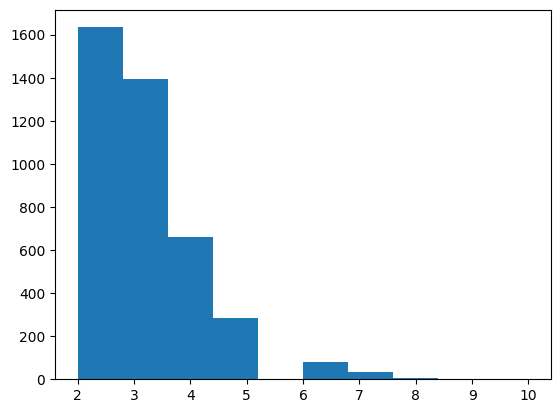

In [74]:
ICI = []
pic_precedent = 0
for indice in range(N):
    if results[-1][indice]:
        dt = indice - pic_precedent
        ICI.append(dt)
        pic_precedent = indice
plt.figure(figsize=(10,3))
plt.plot(np.arange(len(ICI)),ICI)
plt.xlabel('temps (s)')
plt.ylabel('ICI (nb de données)')
plt.show()

plt.hist(ICI)


c:\miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


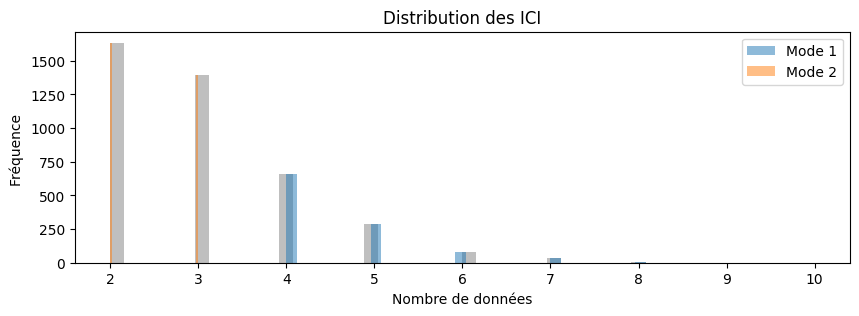

In [62]:
#description bimodale :
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Exemple de distribution bimodale de l'énergie (vous devrez remplacer cela par votre propre distribution)
energy_distribution = np.array(ICI)

# Appliquer K-means pour séparer les deux modes
kmeans = KMeans(n_clusters=2)
kmeans.fit(energy_distribution.reshape(-1, 1))
labels = kmeans.labels_

# Afficher la distribution de l'énergie
plt.figure(figsize=(10, 3))
plt.hist(energy_distribution, bins=50, color='gray', alpha=0.5)
plt.xlabel('Nombre de données')
plt.ylabel('Fréquence ')
plt.title('Distribution des ICI')

# Tracer le signal en surlignant les deux modes avec des couleurs différentes
for i in range(2):
    mode_indices = np.where(labels == i)[0]
    plt.hist(energy_distribution[mode_indices], bins=50, alpha=0.5, label=f'Mode {i+1}')

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


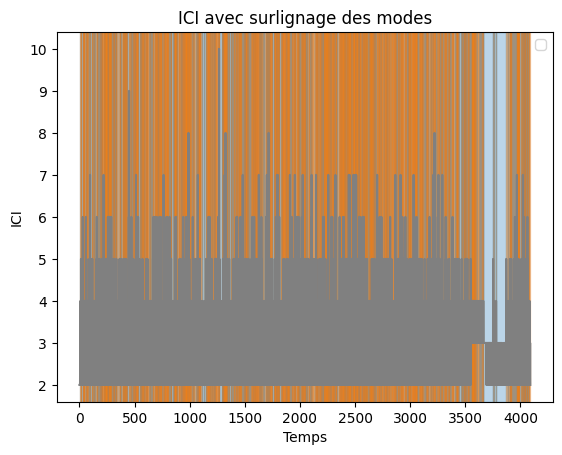

In [63]:
# Tracer l'énergie temporelle du signal et mettre en surbrillance chaque mode avec une couleur différente
plt.plot(ICI, color='gray')

# Mettre en évidence chaque mode avec une couleur différente
for i in range(2):
    mode_indices = np.where(labels == i)[0][:sr]
    for j in range(len(mode_indices) - 1):
        if mode_indices[j + 1] - mode_indices[j] > 1:
            plt.axvspan(mode_indices[j], mode_indices[j + 1], color=f'C{i}', alpha=0.3)

plt.xlabel('Temps')
plt.ylabel('ICI')
plt.title('ICI avec surlignage des modes')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


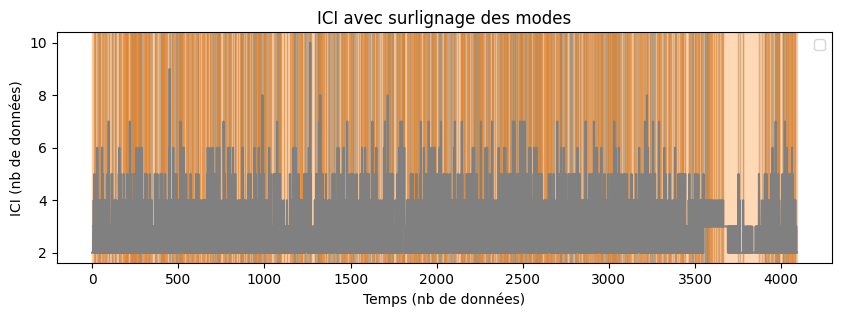

In [64]:
# Tracer l'énergie temporelle du signal et mettre en surbrillance chaque mode avec une couleur différente
plt.figure(figsize=(10,3))
plt.plot(np.arange(len(ICI)),ICI, color='gray')

# Mettre en évidence chaque mode avec une couleur différente
for i in range(2):
    mode_indices = np.where(labels == i)[0]
    start_index = mode_indices[0]  # Début du premier mode
    for j in range(len(mode_indices) - 1):
        if mode_indices[j + 1] - mode_indices[j] > 1:
            end_index = mode_indices[j]  # Fin du mode précédent
            plt.axvspan(start_index, end_index, color=f'C{i}', alpha=0.3)
            start_index = mode_indices[j + 1]  # Début du prochain mode
    # Mettre en surbrillance la fin du dernier mode
    plt.axvspan(start_index, mode_indices[-1], color=f'C{i}', alpha=0.3)
plt.xlabel('Temps (nb de données)')
plt.ylabel('ICI (nb de données)')
plt.title('ICI avec surlignage des modes')
plt.legend()
plt.show()






In [65]:
# Initialisation des compteurs de suites pour chaque mode
nombre_de_suites_mode_0 = 0
nombre_de_suites_mode_1 = 0

# Initialisation de la première étiquette
derniere_etiquette = labels[0]



# Comptage des suites consécutives pour chaque mode
for etiquette in labels[1:]:
    if etiquette != derniere_etiquette:
        if derniere_etiquette == 0:
            nombre_de_suites_mode_0 += 1
        else:
            nombre_de_suites_mode_1 += 1
        derniere_etiquette = etiquette

# Si la dernière étiquette est différente de la première
if derniere_etiquette != labels[0]:
    if derniere_etiquette == 0:
        nombre_de_suites_mode_0 += 1
    else:
        nombre_de_suites_mode_1 += 1

print("Nombre de suites consécutives pour le mode 0:", nombre_de_suites_mode_0)
print("Nombre de suites consécutives pour le mode 1:", nombre_de_suites_mode_1)


Nombre de suites consécutives pour le mode 0: 761
Nombre de suites consécutives pour le mode 1: 761


In [66]:
print(labels[0])

1


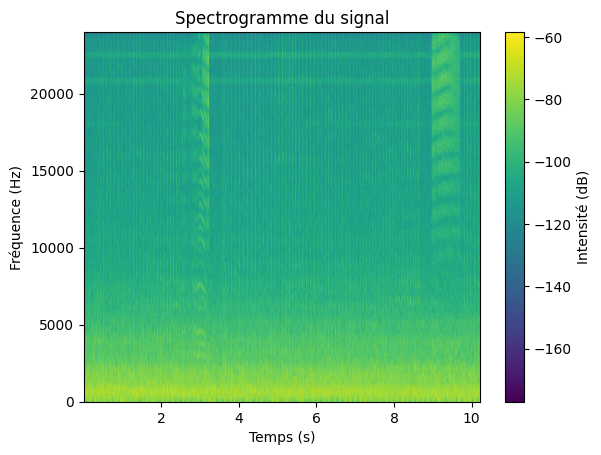

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple de signal
fs = sr  # Fréquence d'échantillonnage
t = times
signal = signal

# Affichage du spectrogramme
plt.specgram(signal, Fs=fs, cmap='viridis')
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence (Hz)')
plt.title('Spectrogramme du signal')
plt.colorbar(label='Intensité (dB)')
plt.show()
